#Imorting Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step 1: Pre-Requisites for Building a Churn Prediction Model
We will use the Telco Customer Churn dataset from Kaggle for this analysis.
Finally, make sure to also have the following libraries installed - pandas, Matplotlib, Seaborn, Scikit-Learn, and Imblearn.

#Step 2: Reviewing the Dataset
First, let’s load the dataframe into Python with the pandas library and take a look at its head. I’ve renamed the file to “customer_churn.csv”, and it is the name I will be using below:

In [ ]:
from google.colab import files
upload = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()
#Notice that the dataframe has 21 columns related to telecom user subscription behavior.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Each user is identified through a unique customer ID. There are 19 independent variables used to predict the target feature – customer churn. In this dataset, customer churn is defined as users who have left within the last month.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Let’s count the number of customers in the dataset who have churned:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Only around 27% of the customers in the dataset have churned. This means that we are dealing with an imbalanced classification problem. We will need to perform some feature engineering to create a balanced training dataset before building the predictive model.

#Step 3: Exploratory Data Analysis for Customer Churn Prediction
Now, let’s perform some exploratory data analysis to gain a better understanding of the independent variables in the dataset and their relationship with customer churn.

We will start by analyzing the demographic data points:

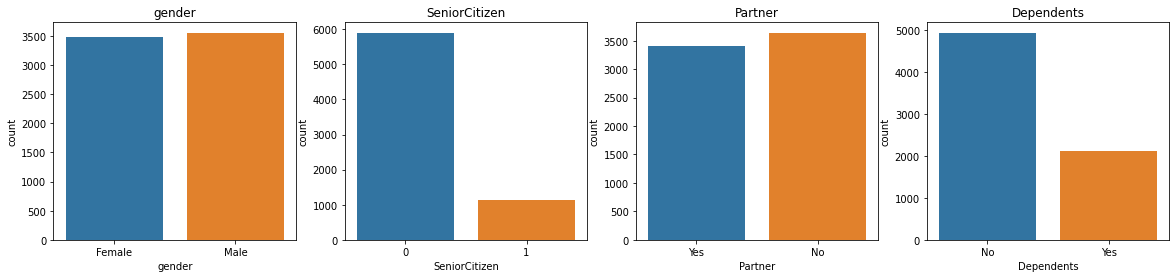

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df)
    ax.set_title(f"{col}")

Most customers in the dataset are younger individuals without a dependent. There is an equal distribution of user gender and marital status.

Now, let’s look into the relationship between cost and customer churn. In the real world, users tend to unsubscribe to their mobile service provider and switch to a different brand if they find the monthly subscription cost too high. Let’s check if that behavior is reflected in our dataset:

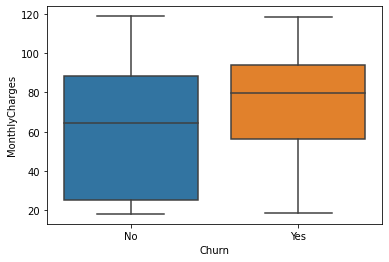

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

The assumption above is true. Customers who churned have a higher median monthly charge than customers who renewed their subscription.

Finally, let’s analyze the relationship between customer churn and a few other categorical variables captured in the dataset:

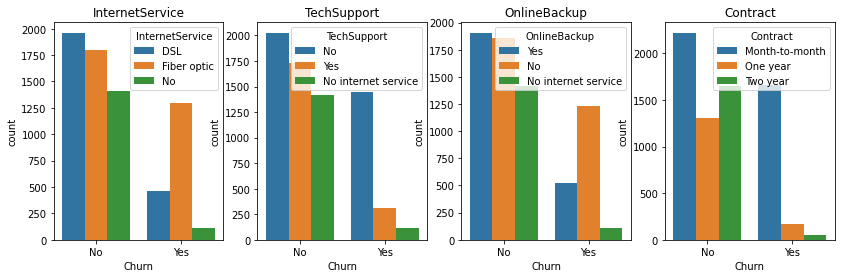

In [ ]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

Let’s look into each attribute:

1.   **InternetService**:It is clear from the visual above that customers who use fiber optic Internet churn more often than other users. This might be because fiber Internet is a more expensive service, or this provider doesn’t have good coverage.
2.   **TechSupport**: Many users who churned did not sign up for tech support. This might mean that these customers did not receive any guidance on fixing technical issues and decided to stop using the service.
3.   **OnlineBackup**: Many customers who had churned did not sign up for an online backup service for data storage.
4.   **Contract**: Users who churned were almost always on a monthly contract. This makes sense, since these customers pay for the service on a monthly basis and can easily cancel their subscription before the next payment cycle.
Even without building a fancy machine learning model, a simple data-driven analysis like this can help organizations understand why they are losing customers and what they can do about it.

For instance, if the company realizes that most of their users who churn have not signed up for tech support, they can include this as a complimentary service in some of their future product offerings to prevent other customers from leaving.


#Step 4: Preprocessing Data for Customer Churn
Now that we have a better understanding of our dataset, let’s perform some data preparation before creating the machine learning model. There are three steps to this process:

In [ ]:
#Cleaning the dataset
#Let’s look at the dataset summary again:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Notice that the variable “TotalCharges” has the data type “object,” when it should be a numeric column. Let’s convert this column into a numeric one:

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

**Encoding Categorical Variables**
:The categorical variables in the dataset need to be converted into a numeric format before we can feed them into the machine learning model. We will perform the encoding using Scikit-Learn’s label encoder.

First, let’s take a look at the categorical features in the dataset:

In [ ]:
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


Now, let’s take a look at the dataset after encoding these categorical variables:

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


Notice that all the categorical values in the dataset have now been replaced with numbers.

Finally, run the following lines of code to merge the dataframe we just created with the previous one:

In [ ]:
num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

**Oversampling**
As mentioned above, the dataset is imbalanced, which means that a majority of values in the target variable belong to a single class. Most customers in the dataset did not churn - only 27% of them did.

This class imbalance problem can lead to an underperforming machine learning model. Some algorithms that train on an imbalanced dataset always end up predicting the majority class. In our case, for instance, the model may predict that none of the customers churned. While a model like this will be highly accurate (in this case it will be correct 73% of the time), it is of no value to us since it is always predicting a single outcome.

There are a variety of techniques that can be used to overcome the class imbalance problem in machine learning. In this tutorial, we will use a technique called oversampling. This is a process that involves randomly selecting samples from the minority class and adding it to the training dataset. We are going to oversample the minority class until the number of data points are equal to that of the majority class.

Before we oversample, let’s do a train-test split. We will oversample solely on the training dataset, as the test dataset must be representative of the true population:

In [ ]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customerID'],axis=1)

X = finaldf.drop(['Churn'],axis=1)
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now, let’s oversample the training dataset:

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

Let’s check the number of samples in each class to ensure that they are equal:

In [ ]:
y_train.value_counts()

0    3452
1    3452
Name: Churn, dtype: int64

There should be 3,452 values in each class, which means that the training dataset is now balanced.

#Step 5: Building the Customer Churn Prediction Model
We will now build a random forest classifier to predict customer churn:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

#Step 6: Customer Churn Prediction Model Evaluation
Let’s evaluate the model predictions on the test dataset:

In [ ]:
# Making the Confusion Matrix
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[1433  278]
 [ 253  357]]


Accuracy is  77.12 %
Precision is  0.56
Recall is  0.59


Our model is performing well, with an accuracy of approximately 0.78 on the test dataset.

